In [4]:
from google.colab import files
uploaded = files.upload()

Saving skincare_sales_bigdata.csv to skincare_sales_bigdata (2).csv


📊 Preview of Data:
                               Order_ID      Product  Quantity  \
0  ef66fb46-0d03-44b9-9ca5-47dc915c6cf7     Cleanser         5   
1  605037d9-fd94-4186-958f-119fe42514b1        Serum         5   
2  8a39cd38-3304-4302-8e4d-f3dff9e23d35     Cleanser         3   
3  6c42ae3f-5e7b-45a8-b279-1c7f7e47d5a3  Night Cream         1   
4  65eb0434-a4a9-4087-a03f-2dd5be7b39bb  Moisturizer         2   

   Price_per_unit     Region  Order_Date  Total_Sale_Value  
0         1364.97    Chennai  2025-06-27           6824.85  
1          278.27  Hyderabad  2025-04-06           1391.35  
2         1400.86  Bangalore  2025-06-08           4202.58  
3         1133.37      Delhi  2025-03-18           1133.37  
4          338.56      Delhi  2025-04-16            677.12  

📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57419 entries, 0 to 57418
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  

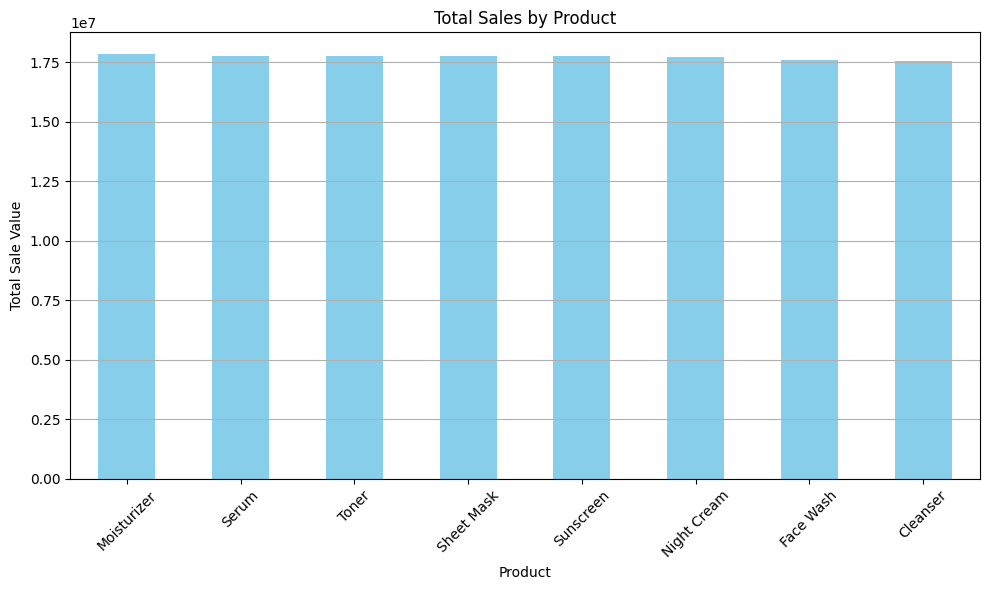


📌 INSIGHTS:
- Top-selling product: Moisturizer
- Least-selling product: Cleanser
- Total revenue: 141743179.81
- Average order value: 2468.576251937512


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("skincare_sales_bigdata.csv")

# 📊 Preview of Data
print("📊 Preview of Data:")
print(df.head())

# 📌 Dataset Info
print("\n📌 Dataset Info:")
print(df.info())

# 🧹 Missing Values
print("\n🧹 Missing Values:")
print(df.isnull().sum())

# 📈 Total Sales by Product
print("\n📈 Total Sales by Product:")
product_sales = df.groupby('Product')['Total_Sale_Value'].sum().sort_values(ascending=False)
print(product_sales)

# 📊 Plot: Top-selling products
plt.figure(figsize=(10,6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product')
plt.ylabel('Total Sale Value')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 📅 Monthly Sales Trend (if 'Date' column exists)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # handles bad date formats too
    df = df.dropna(subset=['Date'])  # drop rows where date conversion failed
    df['Month'] = df['Date'].dt.to_period('M')
    monthly_sales = df.groupby('Month')['Total_Sale_Value'].sum()

    plt.figure(figsize=(10,6))
    monthly_sales.plot(kind='line', marker='o', color='green')
    plt.title('Monthly Sales Trend')
    plt.ylabel('Total Sale Value')
    plt.xlabel('Month')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 📌 INSIGHTS
print("\n📌 INSIGHTS:")
print("- Top-selling product:", product_sales.idxmax())
print("- Least-selling product:", product_sales.idxmin())
print("- Total revenue:", df['Total_Sale_Value'].sum())
print("- Average order value:", df['Total_Sale_Value'].mean())
